In [84]:
import pickle
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [85]:
import sys
import os
address = (os.sep).join(os.getcwd().split(os.sep)[:-3])
print(address)
sys.path.append(address)
print(sys.path)
import util.items as items
import util.scraper as scraper
import util.trading_systems as ts

/home/makoa/School/osrs_research
['/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '', '/home/makoa/.local/lib/python3.6/site-packages', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/home/makoa/.local/lib/python3.6/site-packages/IPython/extensions', '/home/makoa/.ipython', '/home/makoa/School/osrs_research', '/home/makoa/School/osrs_research', '/home/makoa/School/osrs_research']


In [86]:
with open('all_price2.pickle','rb') as f:
    results = pickle.load(f)

In [87]:
len(results)

2115

In [88]:
results['Abyssal_whip'].keys()

dict_keys(['endMAE', 'startLoss', 'opt_params', 'perfect', 'momentum_model', 'model_opt', 'sma', 'testPrices', 'buyAndHold', 'numPrices', 'item', 'startMAE', 'numEpochs', 'budget', 'model', 'stochOscil_model', 'stochOscil', 'opt_days', 'predictions', 'persist', 'sma_model', 'momentum', 'model_days', 'endLoss'])

In [89]:
scaler = StandardScaler()
item = "Abyssal_whip"
r = results[item]

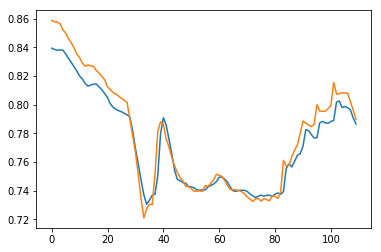

In [90]:
scaler.fit(np.array(r['testPrices'])[:, np.newaxis])
p = scaler.inverse_transform(np.array(r['predictions'])[:, np.newaxis])
plt.plot(p)
plt.plot(r['testPrices'])
plt.show()

lengths 110 110 110
0.22290299728683377


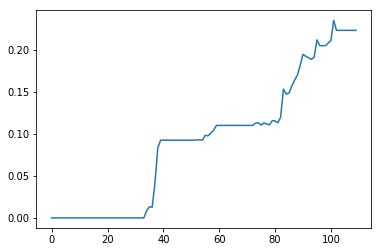

In [91]:
test_prices = r['testPrices']
budget = test_prices[0]*101-1
y_pred = r['predictions']
buySigs = [y_pred[i+5] >= y_pred[i] for i in range(0, len(y_pred)-5)]
buySigs = buySigs + [False]*5
sellSigs = [y_pred[i+5] <= y_pred[i] for i in range(0, len(y_pred)-5)]
sellSigs = sellSigs + [False]*5
print("lengths", len(buySigs), len(sellSigs), len(test_prices))
profit = ts.modelProfit(buySigs, sellSigs, test_prices, budget)
print(profit[-1])
plt.plot(profit)
plt.show()

In [92]:
modelProfs = [(item,results[item]['model']) for item in results ]
modelProfs = sorted(modelProfs, key=lambda x: x[1], reverse=True)
modelProfs_opt = [(item,results[item]['model_opt']) for item in results ]
modelProfs_opt = sorted(modelProfs, key=lambda x: x[1], reverse=True)

In [93]:
pprint(modelProfs[0:10])

[('Ring_mould', 20.176470588235308),
 ('Mind_talisman', 15.920810896420655),
 ('Shears', 11.33695245226507),
 ('Necklace_mould', 8.5027808676307),
 ('Bronze_kiteshield', 5.937106918238996),
 ('Cleaning_cloth', 5.018306636155606),
 ('Shantay_pass', 4.632862644415917),
 ('Vampyre_dust', 4.530922577654151),
 ('Amulet_mould', 4.462753036437247),
 ('Royal_crown', 4.412104740261539)]


In [94]:
modVSpers = [(item,results[item]['model']-results[item]['persist']) for item in results ]
modVSbah = [(item,results[item]['model']-results[item]['buyAndHold']) for item in results ]
mod_optVSpers = [(item,results[item]['model_opt']-results[item]['persist']) for item in results ]
mod_optVSbah = [(item,results[item]['model_opt']-results[item]['buyAndHold']) for item in results ]

In [95]:
modVSpers = sorted(modVSpers, key=lambda x: x[1], reverse=True)
modVSbah = sorted(modVSbah, key=lambda x: x[1], reverse=True)
mod_optVSpers = sorted(mod_optVSpers, key=lambda x: x[1], reverse=True)
mod_optVSbah = sorted(mod_optVSbah, key=lambda x: x[1], reverse=True)

In [96]:
pprint(modVSpers[0:10])
pprint(mod_optVSpers[0:10])

[('Shantay_pass', 3.551989730423619),
 ('Feather', 1.2040133779264215),
 ('Dwellberry_seed', 1.1414141414141414),
 ("Bob's_green_shirt", 1.0461882067765993),
 ('Royal_sceptre', 0.9680167532114136),
 ('Cadavaberry_seed', 0.9597989949748742),
 ("Bob's_red_shirt", 0.9456549554473838),
 ('Loar_remains', 0.8794655031360783),
 ('Big_pirate_hat', 0.8673964313436393),
 ("Bob's_purple_shirt", 0.848487442707043)]
[('Empty_fishbowl', 8.570652173913045),
 ('Jute_seed', 6.857263513513513),
 ('Noose_wand', 3.213780918727918),
 ('Leather_chaps', 2.8979591836734695),
 ('Shortbow_(u)', 2.2359693877551026),
 ('Air_tiara', 1.8744813278008268),
 ('Opal_bolt_tips', 1.8421658986175122),
 ('Feather', 1.1973244147157192),
 ('Marigold_seed', 1.1467391304347831),
 ('Tomato_seed', 0.9897959183673468)]


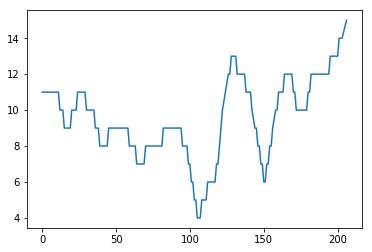

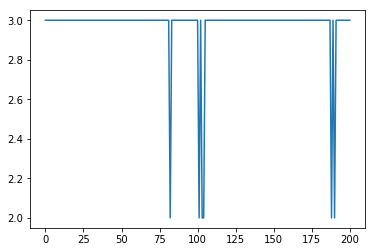

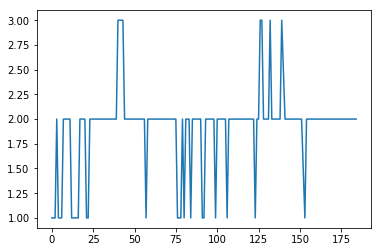

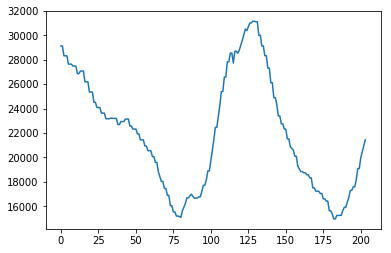

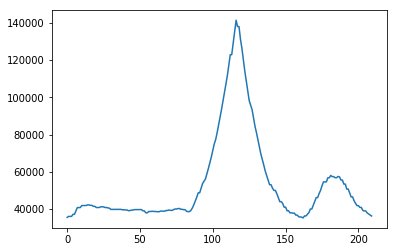

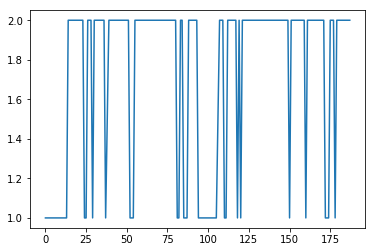

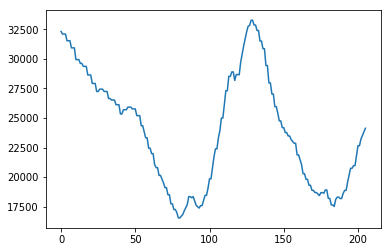

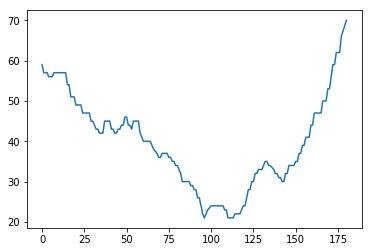

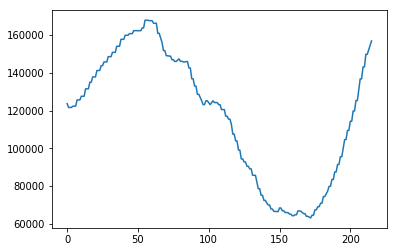

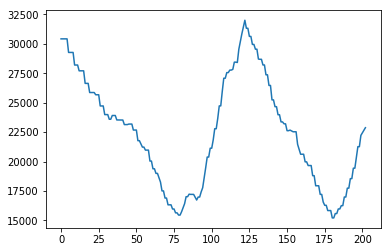

In [97]:
for a in modVSpers[0:10]:
    prices = items.getPrices(a[0])
    prices = prices[int(.85*len(prices)):]
    plt.plot(prices)
    plt.show()

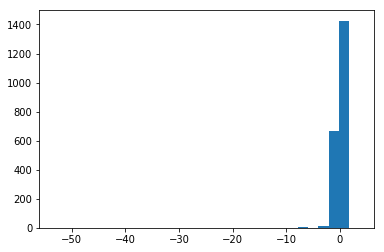

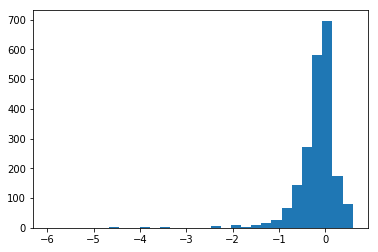

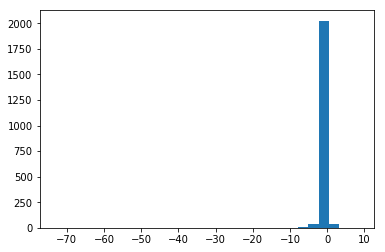

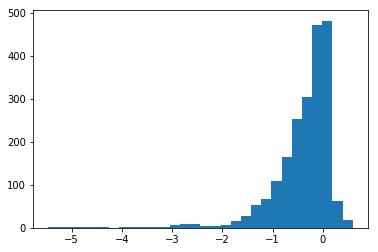

In [98]:
plt.hist([a[1] for a in modVSpers],30)
plt.show()
plt.hist([a[1] for a in modVSpers if a[1]>-6 and a[1]<.6],30)
plt.show()
plt.hist([a[1] for a in mod_optVSpers],30)
plt.show()
plt.hist([a[1] for a in mod_optVSpers if a[1]>-6 and a[1]<.6],30)
plt.show()

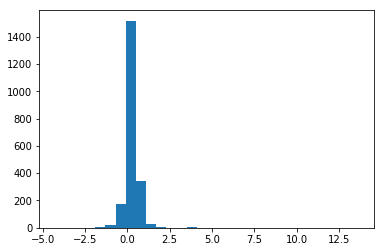

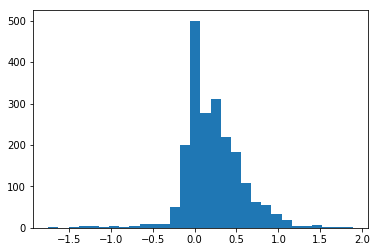

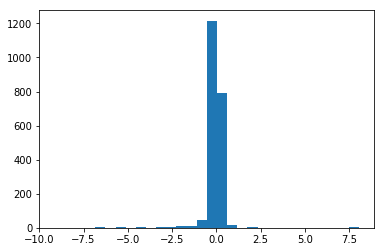

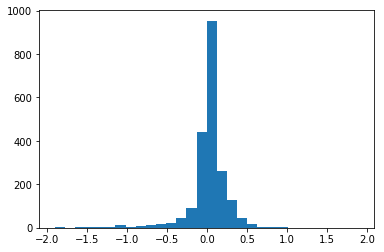

In [99]:
plt.hist([a[1] for a in modVSbah],30)
plt.show()
plt.hist([a[1] for a in modVSbah if a[1]>-2 and a[1]<2],30)
plt.show()
plt.hist([a[1] for a in mod_optVSbah],30)
plt.show()
plt.hist([a[1] for a in mod_optVSbah if a[1]>-2 and a[1]<2],30)
plt.show()

In [100]:
numProfModels = len([a for a in modelProfs if a[1]>0])
numProfmodVSpers = len([a for a in modVSpers if a[1]>0])
numProfmodVSbah = len([a for a in modVSbah if a[1]>0])
numProfModels_opt = len([a for a in modelProfs_opt if a[1]>0])
numProfmod_optVSpers = len([a for a in mod_optVSpers if a[1]>0])
numProfmod_optVSbah = len([a for a in mod_optVSbah if a[1]>0])

In [101]:
print(len(results))
print(numProfModels/len(results))
print(numProfmodVSpers/len(results))
print(numProfmodVSbah/len(results))
print(numProfModels_opt/len(results))
print(numProfmod_optVSpers/len(results))
print(numProfmod_optVSbah/len(results))

2115
0.5962174940898345
0.2799054373522459
0.7087470449172577
0.5962174940898345
0.16832151300236406
0.5853427895981087


In [102]:
actualModProfs = [(item,items.getPrices(item)[-1]*results[item]['model']) for item in results if items.getPrices(item)[-1]<10000000]
actualModProfs = sorted(actualModProfs, key=lambda x: x[1], reverse=True)

actualPersProfs = [(item,items.getPrices(item)[-1]*results[item]['persist']) for item in results if items.getPrices(item)[-1]<10000000]
actualPersProfs = sorted(actualPersProfs, key=lambda x: x[1], reverse=True)

actualPersVsModProfs = [(item,items.getPrices(item)[-1]*results[item]['model']) for item in results if items.getPrices(item)[-1]<10000000 and (results[item]['model']-results[item]['persist'])>0]
actualPersVsModProfs = sorted(actualPersVsModProfs, key=lambda x: x[1], reverse=True)

In [103]:
actualModProfsPerDay = [(item,(items.getPrices(item)[-1]*results[item]['model'])/(results[item]['numPrices']*.15)) for item in results if items.getPrices(item)[-1]<10000000]
actualModProfsPerDay = sorted(actualModProfsPerDay, key=lambda x: x[1], reverse=True)
actualPersProfsPerDay = [(item,(items.getPrices(item)[-1]*results[item]['persist'])/(results[item]['numPrices']*.15)) for item in results if items.getPrices(item)[-1]<10000000]
actualPersProfsPerDay = sorted(actualPersProfsPerDay, key=lambda x: x[1], reverse=True)

In [104]:
pprint(actualModProfs[0:10])
pprint(actualPersProfs[0:10])
pprint(actualPersVsModProfs[0:10])

[('Serpentine_helm_(uncharged)', 2798968.3137825),
 ("Rangers'_tunic", 2430190.1062536407),
 ("Pharaoh's_sceptre", 2056388.9069981154),
 ('Royal_crown', 2014222.8802336785),
 ('Uncharged_toxic_trident', 1844151.936187437),
 ("Ahrim's_armour_set", 1679524.6137244415),
 ('Gilded_boots', 1675214.0298217947),
 ("Pharaoh's_sceptre_(3)", 1509699.7170092517),
 ('Eternal_crystal', 1490518.7413820468),
 ('Staff_of_the_dead', 1486043.2329812003)]
[('Serpentine_visage', 5795293.686336861),
 ('Serpentine_helm_(uncharged)', 5138134.48264703),
 ('Magic_fang', 4770308.968965331),
 ('Uncharged_toxic_trident', 4714426.355042224),
 ("Pharaoh's_sceptre_(3)", 4320727.159273365),
 ('Staff_of_the_dead', 3792473.620763099),
 ('Toxic_staff_(uncharged)', 3670363.0782146202),
 ("Rangers'_tunic", 3385048.927958419),
 ("Pharaoh's_sceptre", 3095458.4348627403),
 ('Smouldering_stone', 2621970.098551764)]
[("Ahrim's_armour_set", 1679524.6137244415),
 ('Gilded_boots', 1675214.0298217947),
 ("Saradomin's_tear", 132624

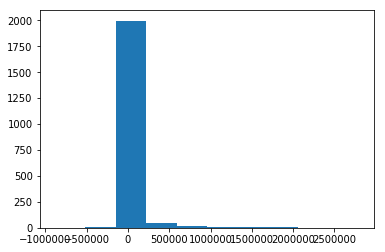

In [105]:
plt.hist([a[1] for a in actualModProfs])
plt.show()

In [106]:
prices = [items.getPrices(item)[-1] for item in results]
buylimits = [int(items.getInfo(item)['buyLimit']) for item in results]
profs = [results[item]['model'] for item in results]
pers = [results[item]['persist'] for item in results]
perf = [results[item]['perfect'] for item in results]
bah = [results[item]['buyAndHold'] for item in results]
sma = [results[item]['sma'] for item in results]
stochOscil = [results[item]['stochOscil'] for item in results]
momentum = [results[item]['momentum'] for item in results]
mae = [results[item]['endMAE'] for item in results]
prof_perf_diff = [abs(results[item]['perfect'] - results[item]['model']) for item in results]

In [107]:
print(np.mean(profs))
print(np.median(profs))
print('price,profs',np.corrcoef(prices,profs)[0][1])
print('bl,price',np.corrcoef(buylimits,prices)[0][1])
print('prof,pers',np.corrcoef(profs,pers)[0][1])
print('profs,perf',np.corrcoef(profs,perf)[0][1])
print('profs,bah',np.corrcoef(profs,bah)[0][1])
print('profs,sma',np.corrcoef(profs,sma)[0][1])
print('profs,stochOscil',np.corrcoef(profs,stochOscil)[0][1])
print('profs,momentum',np.corrcoef(profs,momentum)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])
print('prices,mae',np.corrcoef(prices,mae)[0][1])
print('profs,mae',np.corrcoef(profs,mae)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])

0.21400610650037127
0.04818447771467937
price,profs -0.01284271339628844
bl,price -0.05144175220748756
prof,pers 0.8495167565437134
profs,perf -0.03236417602428822
profs,bah 0.6287982632238537
profs,sma 0.7858122611909003
profs,stochOscil 0.6205027192006686
profs,momentum 0.5702496121677162
profdiff,mae 0.05915224955947585
prices,mae -0.007226992000329215
profs,mae -0.18484767826736254
profdiff,mae 0.05915224955947585


In [108]:
prices = [items.getPrices(item)[-1] for item in results if results[item]['model']>results[item]['persist']]
buylimits = [int(items.getInfo(item)['buyLimit']) for item in results if results[item]['model']>results[item]['persist']]
profs = [results[item]['model'] for item in results if results[item]['model']>results[item]['persist']]
pers = [results[item]['persist'] for item in results if results[item]['model']>results[item]['persist']]
perf = [results[item]['perfect'] for item in results if results[item]['model']>results[item]['persist']]
bah = [results[item]['buyAndHold'] for item in results if results[item]['model']>results[item]['persist']]
sma = [results[item]['sma'] for item in results if results[item]['model']>results[item]['persist']]
stochOscil = [results[item]['stochOscil'] for item in results if results[item]['model']>results[item]['persist']]
momentum = [results[item]['momentum'] for item in results if results[item]['model']>results[item]['persist']]
mae = [results[item]['endMAE'] for item in results if results[item]['model']>results[item]['persist']]
prof_perf_diff = [abs(results[item]['perfect'] - results[item]['model']) for item in results if results[item]['model']>results[item]['persist']]

In [109]:
print(np.mean(profs))
print(np.median(profs))
print('price,profs',np.corrcoef(prices,profs)[0][1])
print('bl,price',np.corrcoef(buylimits,prices)[0][1])
print('prof,pers',np.corrcoef(profs,pers)[0][1])
print('profs,perf',np.corrcoef(profs,perf)[0][1])
print('profs,bah',np.corrcoef(profs,bah)[0][1])
print('profs,sma',np.corrcoef(profs,sma)[0][1])
print('profs,stochOscil',np.corrcoef(profs,stochOscil)[0][1])
print('profs,momentum',np.corrcoef(profs,momentum)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])
print('prices,mae',np.corrcoef(prices,mae)[0][1])
print('profs,mae',np.corrcoef(profs,mae)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])

0.16115539565771822
0.03364107780336814
price,profs -0.02678315646267632
bl,price -0.06518591512472104
prof,pers 0.8269337178821103
profs,perf -0.0751593926533952
profs,bah 0.5159532859194601
profs,sma 0.8668076428439117
profs,stochOscil 0.6093707661976756
profs,momentum 0.6615707291961196
profdiff,mae 0.14016661314846185
prices,mae -0.01916390862410071
profs,mae -0.1832492818158333
profdiff,mae 0.14016661314846185


In [110]:
prices = [items.getPrices(item)[-1] for item in results if results[item]['model']>0]
buylimits = [int(items.getInfo(item)['buyLimit']) for item in results if results[item]['model']>0]
profs = [results[item]['model'] for item in results if results[item]['model']>0]
pers = [results[item]['persist'] for item in results if results[item]['model']>0]
perf = [results[item]['perfect'] for item in results if results[item]['model']>0]
bah = [results[item]['buyAndHold'] for item in results if results[item]['model']>0]
mae = [results[item]['endMAE'] for item in results if results[item]['model']>0]
prof_perf_diff = [abs(results[item]['perfect'] - results[item]['model']) for item in results if results[item]['model']>0]

In [111]:
print('price,profs',np.corrcoef(prices,profs)[0][1])
print('bl,price',np.corrcoef(buylimits,prices)[0][1])
print('prof,pers',np.corrcoef(profs,pers)[0][1])
print('profs,perf',np.corrcoef(profs,perf)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])
print('prices,mae',np.corrcoef(prices,mae)[0][1])
print('profs,mae',np.corrcoef(profs,mae)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])

price,profs -0.023323631214478946
bl,price -0.04904501669890219
prof,pers 0.8685448669195606
profs,perf 0.16904016179730155
profdiff,mae 0.11273265472156054
prices,mae 0.017644873685931203
profs,mae -0.194267590291191
profdiff,mae 0.11273265472156054


In [112]:
prices = [items.getPrices(item)[-1] for item in results if results[item]['model']<0]
buylimits = [int(items.getInfo(item)['buyLimit']) for item in results if results[item]['model']<0]
profs = [results[item]['model'] for item in results if results[item]['model']<0]
pers = [results[item]['persist'] for item in results if results[item]['model']<0]
perf = [results[item]['perfect'] for item in results if results[item]['model']<0]
bah = [results[item]['buyAndHold'] for item in results if results[item]['model']<0]
mae = [results[item]['endMAE'] for item in results if results[item]['model']<0]
prof_perf_diff = [abs(results[item]['perfect'] - results[item]['model']) for item in results if results[item]['model']<0]

In [113]:
print('price,profs',np.corrcoef(prices,profs)[0][1])
print('bl,price',np.corrcoef(buylimits,prices)[0][1])
print('prof,pers',np.corrcoef(profs,pers)[0][1])
print('profs,perf',np.corrcoef(profs,perf)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])
print('prices,mae',np.corrcoef(prices,mae)[0][1])
print('profs,mae',np.corrcoef(profs,mae)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])

price,profs 0.06388757180322456
bl,price -0.09313254920789005
prof,pers -0.09289086418469195
profs,perf -0.3602802842750162
profdiff,mae 0.05231712880654221
prices,mae -0.05433491856491821
profs,mae -0.03539109054074937
profdiff,mae 0.05231712880654221
